In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
!gdown 1njvO4vkjUyJy4CanjL6zzIjlKzEQ6RBt
!unzip -o bank-data.zip

Downloading...
From: https://drive.google.com/uc?id=1njvO4vkjUyJy4CanjL6zzIjlKzEQ6RBt
To: /content/bank-data.zip
100% 516k/516k [00:00<00:00, 126MB/s]
Archive:  bank-data.zip
  inflating: __MACOSX/._bank-data    
  inflating: bank-data/.DS_Store     
  inflating: __MACOSX/bank-data/._.DS_Store  
  inflating: bank-data/bank-full.csv  
  inflating: __MACOSX/bank-data/._bank-full.csv  


In [26]:
df = pd.read_csv('bank-data/bank-full.csv', delimiter=';')
to_drop = ['contact', 'day', 'month']
df = df.drop(columns=to_drop)
Y = df['y']
Y = Y
X = df.drop('y', axis=1)
X

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,-1,0,unknown


In [27]:
for index, item in enumerate(X['marital']):
  if str(item) == 'single':
    X['marital'][index] = 0
  elif str(item) == 'married':
    X['marital'][index] = 1
  elif str(item) == 'divorced':
    X['marital'][index] = 2

for index, item in enumerate(X['poutcome']):
  if str(item) == 'unknown':
    X['poutcome'][index] = 0
  elif str(item) == 'success':
    X['poutcome'][index] = 1
  elif str(item) == 'other':
    X['poutcome'][index] = 2
  elif str(item) == 'failure':
    X['poutcome'][index] = 3

for index, item in enumerate(X['education']):
  if str(item) == 'unknown':
    X['education'][index] = 0
  elif str(item) == 'primary':
    X['education'][index] = 1
  elif str(item) == 'secondary':
    X['education'][index] = 2
  elif str(item) == 'tertiary':
    X['education'][index] = 3


for index, item in enumerate(X['job']):
  if str(item) == 'unknown':
    X['job'][index] = 0
  elif str(item) == 'admin.':
    X['job'][index] = 1
  elif str(item) == 'retired':
    X['job'][index] = 2
  elif str(item) == 'unemployed':
    X['job'][index] = 3
  elif str(item) == 'management':
    X['job'][index] = 4
  elif str(item) == 'blue-collar':
    X['job'][index] = 5
  elif str(item) == 'technician':
    X['job'][index] = 6
  elif str(item) == 'services':
    X['job'][index] = 7
  elif str(item) == 'student':
    X['job'][index] = 8
  elif str(item) == 'housemaid':
    X['job'][index] = 9
  elif str(item) == 'entrepreneur':
    X['job'][index] = 10
  elif str(item) == 'self-employed':
    X['job'][index] = 11

for index, item in enumerate(X['default']):
  if str(item) == 'no':
    X['default'][index] = -1
  else:
    X['default'][index] = 1


for index, item in enumerate(X['housing']):
  if str(item) == 'no':
    X['housing'][index] = -1
  else:
    X['housing'][index] = 1


for index, item in enumerate(X['loan']):
  if str(item) == 'no':
    X['loan'][index] = -1
  else:
    X['loan'][index] = 1
for index, item in enumerate(Y):
  if str(item) == 'no':
    Y[index] = -1
  else:
    Y[index] = 1
Y = Y.astype('int')

<ipython-input-27-db22d4594567>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['marital'][index] = 1
<ipython-input-27-db22d4594567>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['marital'][index] = 0
<ipython-input-27-db22d4594567>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['marital'][index] = 2
<ipython-input-27-db22d4594567>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [6]:
X = (X -np.min(X))/(np.max(X)-np.min(X)).values
X

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,0.519481,0.363636,0.5,1.0,0.0,0.092259,1.0,0.0,0.05307,0.0,0.0,0.0,0.0
1,0.337662,0.545455,0.0,0.666667,0.0,0.073067,1.0,0.0,0.030704,0.0,0.0,0.0,0.0
2,0.194805,0.909091,0.5,0.666667,0.0,0.072822,1.0,1.0,0.015453,0.0,0.0,0.0,0.0
3,0.376623,0.454545,0.5,0.0,0.0,0.086476,1.0,0.0,0.018707,0.0,0.0,0.0,0.0
4,0.194805,0.0,0.0,0.0,0.0,0.072812,0.0,0.0,0.04026,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.545455,0.5,1.0,0.0,0.080293,0.0,0.0,0.198658,0.032258,0.0,0.0,0.0
45207,0.688312,0.181818,1.0,0.333333,0.0,0.088501,0.0,0.0,0.092721,0.016129,0.0,0.0,0.0
45208,0.701299,0.181818,0.5,0.666667,0.0,0.124689,0.0,0.0,0.229158,0.064516,0.212156,0.010909,0.333333
45209,0.506494,0.454545,0.5,0.666667,0.0,0.078868,0.0,0.0,0.103294,0.048387,0.0,0.0,0.0


<AxesSubplot:>

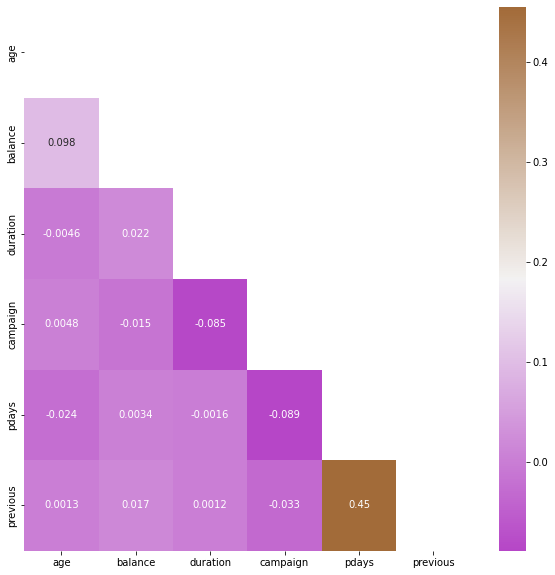

In [23]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(300, 40, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
classifier = svm.SVC(kernel='sigmoid')
classifier = classifier.fit(x_train, y_train)

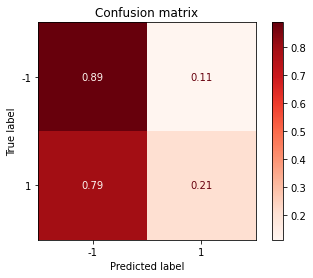

In [18]:
matrix = ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test, cmap=plt.cm.Reds, normalize='true')
plt.title('Confusion matrix')
plt.show(matrix)
plt.show()

In [12]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100.0
print("Accuracy is : ",accuracy)

Accuracy is :  80.71436470197943
